# Superstore dataset

This dataset contains information about a superstore.
Reference link: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download

In this Jupyter Notebook I have analysed the dataset of the superstore to answer several questions. For example:
1. what is the best month for sales
2. which products are sold the most
3. which customer segment has received the most discounts
4. relationship between variables: a graphical representation of the relationship between the variables using a scatter plot.
5. Correlation between customer segment and quantity using a heatmap.
6. Total sales and profit per state.

## Context
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

## Metadata
Row ID => Unique ID for each row.

Order ID => Unique Order ID for each Customer.

Order Date => Order Date of the product.

Ship Date => Shipping Date of the Product.

Ship Mode=> Shipping Mode specified by the Customer.

Customer ID => Unique ID to identify each Customer.

Customer Name => Name of the Customer.

Segment => The segment where the Customer belongs.

Country => Country of residence of the Customer.

City => City of residence of of the Customer.

State => State of residence of the Customer.

Postal Code => Postal Code of every Customer.

Region => Region where the Customer belong.

Product ID => Unique ID of the Product.

Category => Category of the product ordered.

Sub-Category => Sub-Category of the product ordered.

Product Name => Name of the Product

Sales => Sales of the Product.

Quantity => Quantity of the Product.

Discount => Discount provided.

Profit => Profit/Loss incurred.



At first, let's import the necessary libraries. Afterwards, let's import the dataset.
We can visualise the dataset using the head() method.

In [45]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

# Detect the encoding of the file
with open('superstore.csv', 'rb') as f:
  rawdata = f.read()
  result = chardet.detect(rawdata)
  encoding = result['encoding']

# Use the detected encoding in pd.read_csv()
df = pd.read_csv('superstore.csv', encoding=encoding)

# Print the shape and the first 5 rows of the dataframe
print(df.shape)
df.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


There are 21 columns and 9994 rows in the dataset.

Let's check the datatypes of the columns and see if there are any missing values using the info() and method.

In [46]:
# Print the information of the dataframe (columns, data types, non-null values, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

There are 21 columns and all of them have only non-null values (9994 non-null, equalling to the row counts).
There are numbers (three "int64" and three "float64") and strings (fifteen "object") in the dataset.

Let's check the statistical summary of the dataset using the describe() method. Mind that this method only works for numerical columns.

In [47]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


The description of the dataset is as follows (the column "Postal Code" is not included because it is a categorical variable, not a numerical one):

- Sales: mean = 229.85, standard deviation = 623.24.
- Quantity: mean = 3.78, standard deviation = 2.22. Maximum = 14, minimum = 1 (obviously, otherwise there wouldn't be any sale).
- Discount: mean = 0.16, standard deviation = 0.21. Maximum = 0.8, minimum = 0.0. It looks that there have been very little discounts.
- Profit: mean = 28.66, standard deviation = 234.26. The mean profit for products has been 28.66 dollars, but we have to be careful, becase the minimum profit is -6599.97 dollars, meaninng that there have been some losses as well. The highest profit is 8399.98 dollars. The median profit (50% percentile) is 8.67. 

## First question from the superstore manager: what is the best month for sales?
The manager of the superstore wants to know in which period of the year the sales are the highest.
In order to do this, we can group the dataset by the "Order Date" column per month and then calculate the sum of the "Sales" per month, which is the total amount of dollars of a sale.

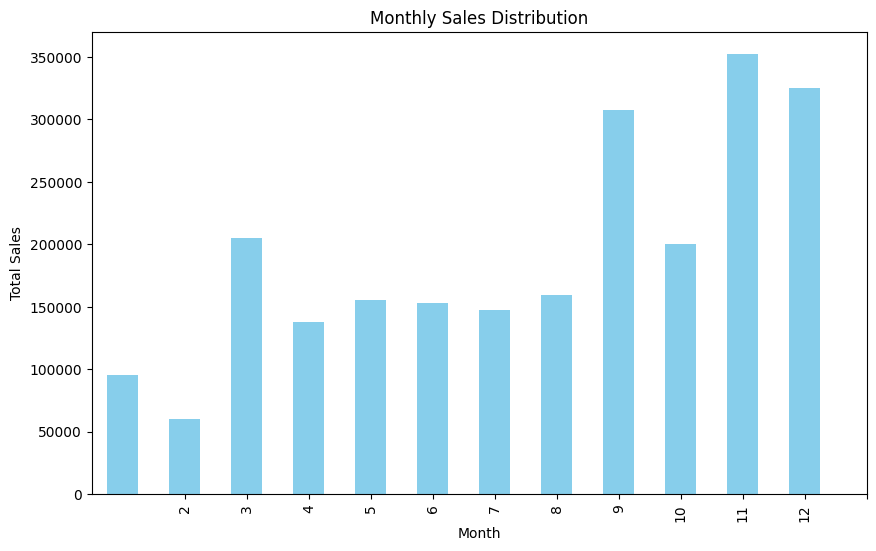

In [48]:
# 1. Extract month as a numerical value (1-12)
df['Month'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y').dt.month

# 2. Group sales by month and calculate total sales per month
monthly_sales = df.groupby('Month')['Sales'].sum()

# 3. Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
monthly_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Distribution')
plt.xticks(range(1, 13))  # Set month labels (1-12)
plt.show()

The plot shows that the sales are the highest in the month of November, followed by December and September. In general, the sales are the lowest in from April to August. Also January and February have the lowest sales. A reason for this could be that the sales are the highest before holiday season and the lowest after holiday season.

## Second question from the superstore manager: which products are sold the most?
The manager of the superstore wants to know which products (product names) and which product categories are sold the most.
In order to do this, we can group the dataset by the "Product Name" and the "Sub-Category" column and then calculate the sum of the "Quantity" per product.

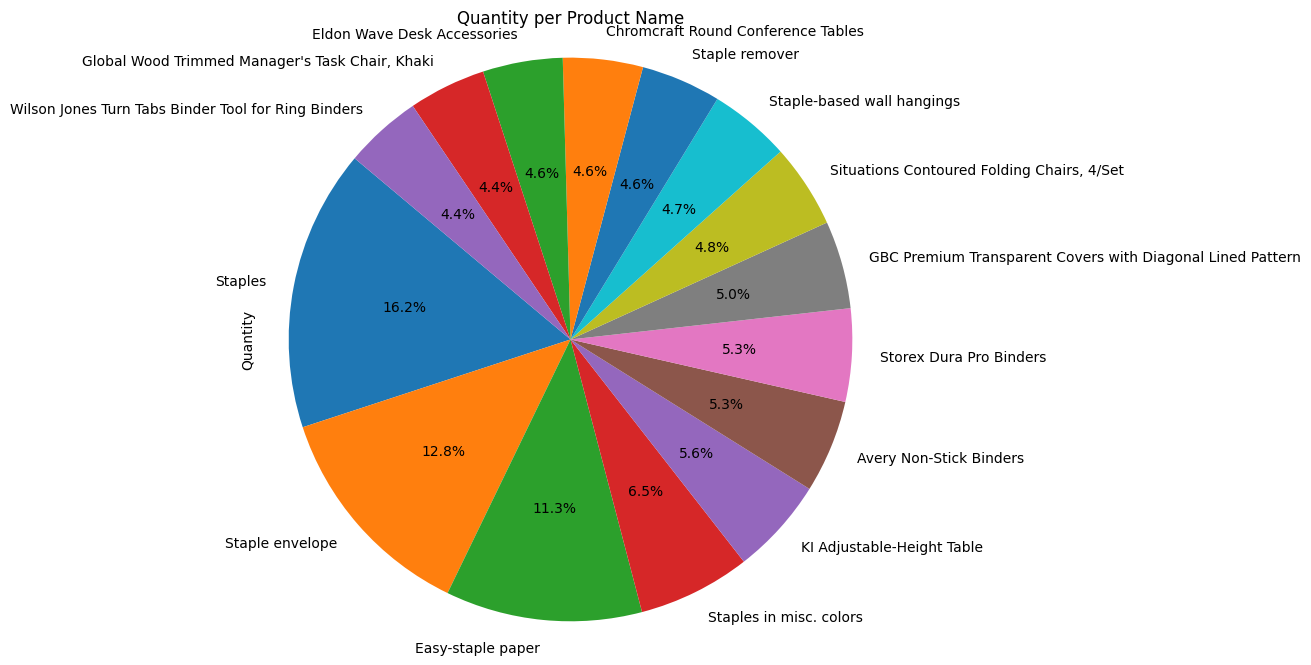

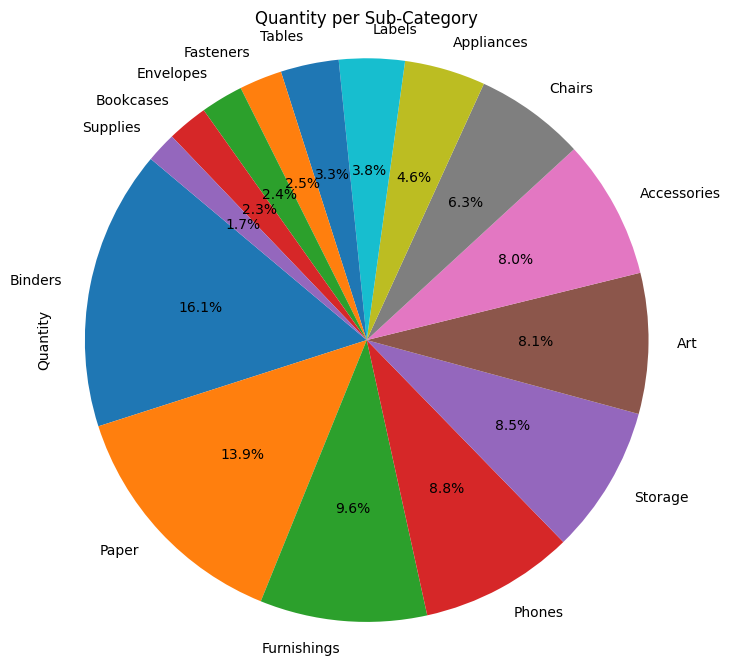

In [61]:
# Define a list of variables to compare with Sales
comparison_vars = ['Product Name', 'Sub-Category']

# Iterate through the list and create scatter plots
for var in comparison_vars:
    # 1. Group products by name and sum quantities
    product_sales = df.groupby(var)['Quantity'].sum().sort_values(ascending=False)

    # 2. Slice the DataFrame to get the top 15 products
    top_15_products = product_sales.head(15)

    # 3. Create a pie chart
    plt.figure(figsize=(8, 8))  # Adjust figure size as needed
    top_15_products.plot(kind='pie', autopct='%1.1f%%', startangle=140)  # Customize labels and angle
    plt.axis('equal')  # Equal aspect ratio for a circular pie chart
    plt.title(f'Quantity share per {var}')
    plt.show()

From the plot, we can see that many of the 15 products sold are related to office supplies (staples). It makes sense for the superstore to focus on these products to meet customer demands.

We can see that the most sold product sub-categories are  the Binders, Paper, Furnishings, Phones, and Storage categories. It makes sense for the superstore to focus on these product categories to meet customer demands.

# Third question from the superstore manager: which customer segment has received the most discounts?
Thirdly, the manager of the superstore wants to know which customer segment has received the most discounts. 
We can group the dataset by the "Segment" column and then calculate the sum of the "Discount" and plot the results using a bar chart.

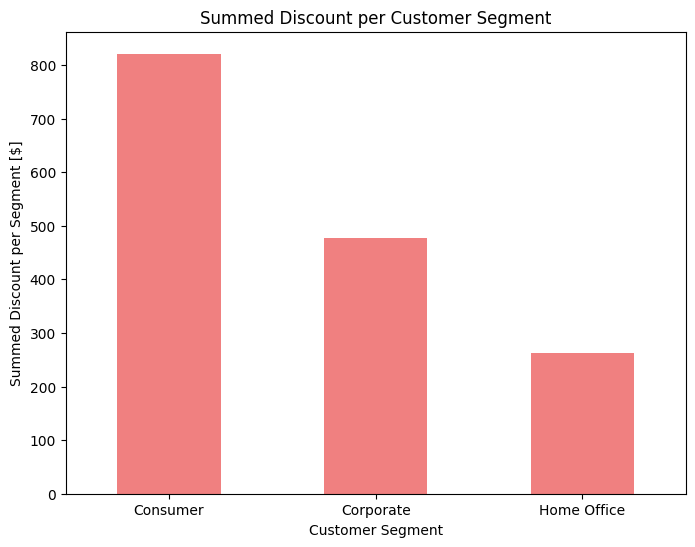

In [55]:
# 1. Calculate the average discount per customer segment
discount_segment = df.groupby('Segment')['Discount'].sum().sort_values(ascending=False)

# 2. Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
discount_segment.plot(kind='bar', color='lightcoral')
plt.xlabel('Customer Segment')
plt.ylabel('Summed Discount per Segment [$]')
plt.title('Summed Discount per Customer Segment')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability if many segments
plt.show()

# Data inspection: relationship between variables
To inspect the relationship between variables, we can use a scatter plot. 
Let's investigate the relationship between Sales vs Discount, Profit and Quantity.

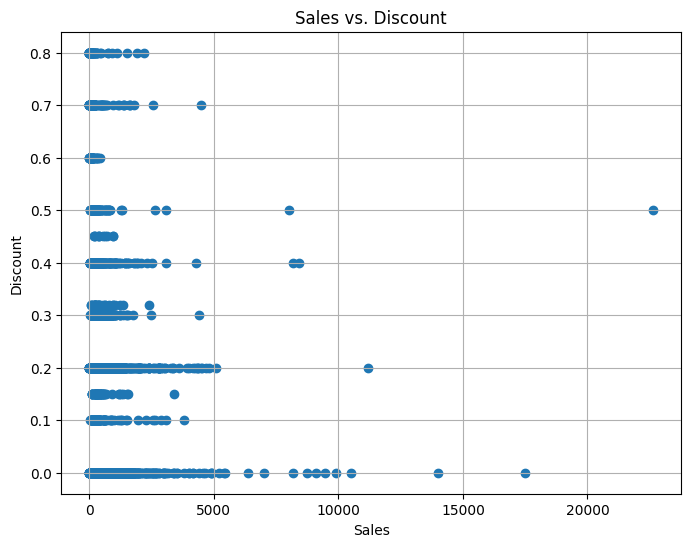

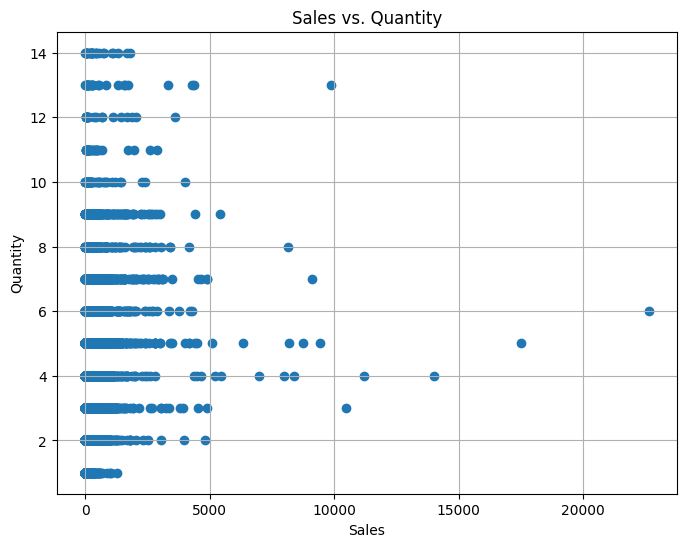

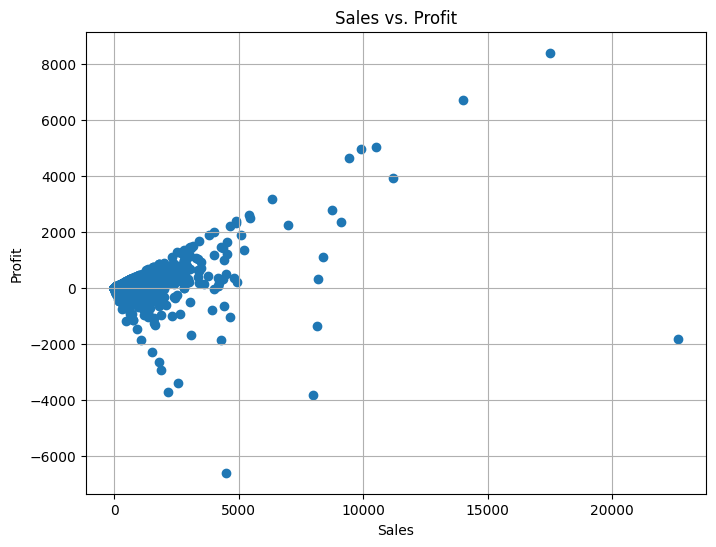

In [51]:
# Define a list of variables to compare with Sales
comparison_vars = ['Discount', 'Quantity', 'Profit']

# Iterate through the list and create scatter plots
for var in comparison_vars:
  plt.figure(figsize=(8, 6))  # Adjust figure size as needed
  plt.scatter(df['Sales'], df[var])
  plt.xlabel('Sales')
  plt.ylabel(var)
  plt.title(f'Sales vs. {var}')
  plt.grid(True)  # Add grid lines for better readability
  plt.show()

There are a couple of interesting observations from the scatter plots: 
1. First, by increasing the sale, the discount does not increase. 
2. Secondly, the highest sales concentrate around 4-6 units of quantity.
3. Thirdly, the profit increses as the sales increase, but there is a substatial amount of loss even with sales up to 5000 $.

# Heatmap between categorical variables Segment and Category
We now want to explore the correlation between the categorical variables "Category" and "Segment" using a heatmap.

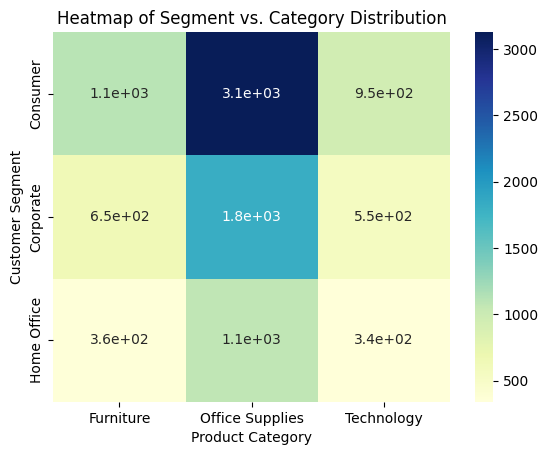

In [52]:
# Create a contingency table using cross-tabulation
contingency_table = pd.crosstab(df['Segment'], df['Category'])

# Create a heatmap using seaborn
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')  # Adjust colormap as desired
plt.title('Heatmap of Segment vs. Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Customer Segment')
plt.show()

By the heatmap, we can see that the "Office Supplies" category is the most popular overall and especially in the "Consumer" segment.

# Total sales and profit per state
In the following question, the manager of the superstore wants to know the total sales and the total profits per state. We can group the dataset by the "State" column and then calculate the sum of the "Sales" and of the "Profit". 
Doing this we can understand which states have the highest sales and the highest profit.

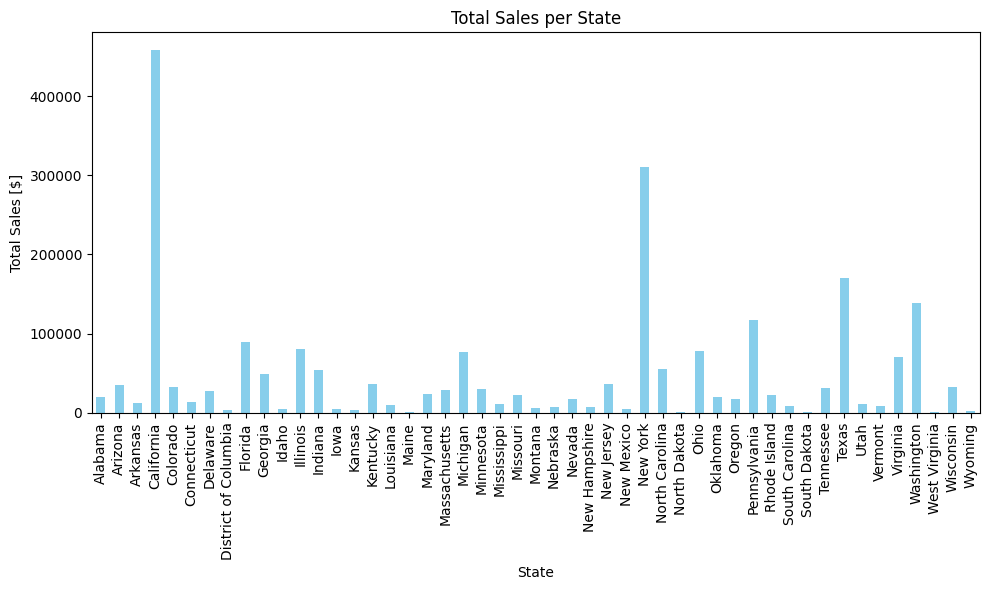

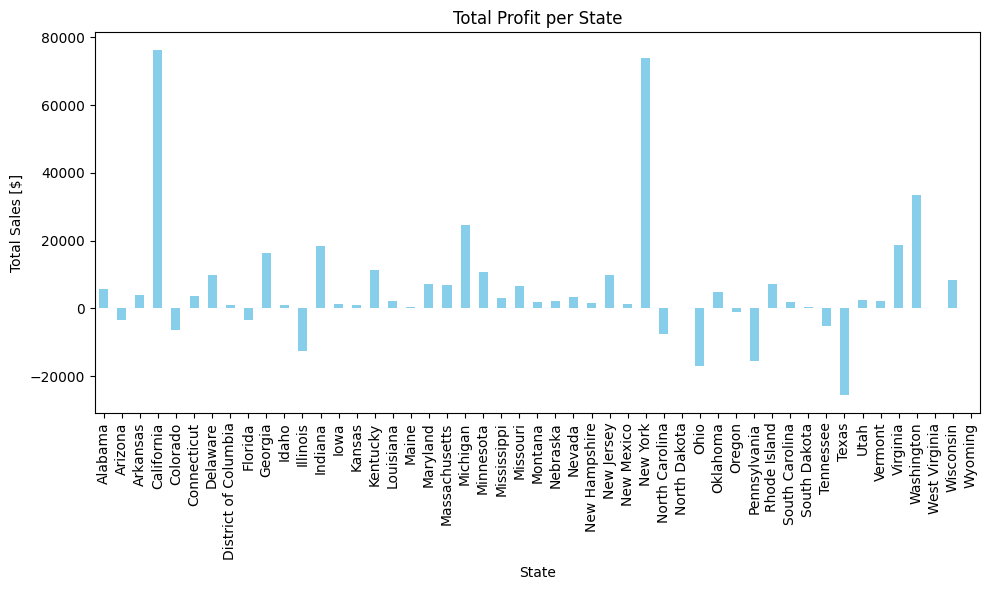

In [60]:
# Define the comparison variables
comparison_vars = ['Sales', 'Profit']

# Iterate through the list and create scatter plots
for var in comparison_vars:
    # 1. Group by State and calculate total sales
    state_sales = df.groupby('State')[var].sum()

    # 2. Create a bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as desired
    state_sales.plot(kind='bar', color='skyblue')
    plt.xlabel('State')
    plt.ylabel('Total Sales [$]')
    plt.title(f'Total {var} per State')
    #plt.xticks(rotationv=45)  # Rotate x-axis labels for better readability (optional)
    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()

Thanks to the bar chart, we can see that the states with the highest sales as well the highest profits are California, New York.